# Lab 12

_[General notebook information](https://computing-in-context.afeld.me/notebooks.html)_


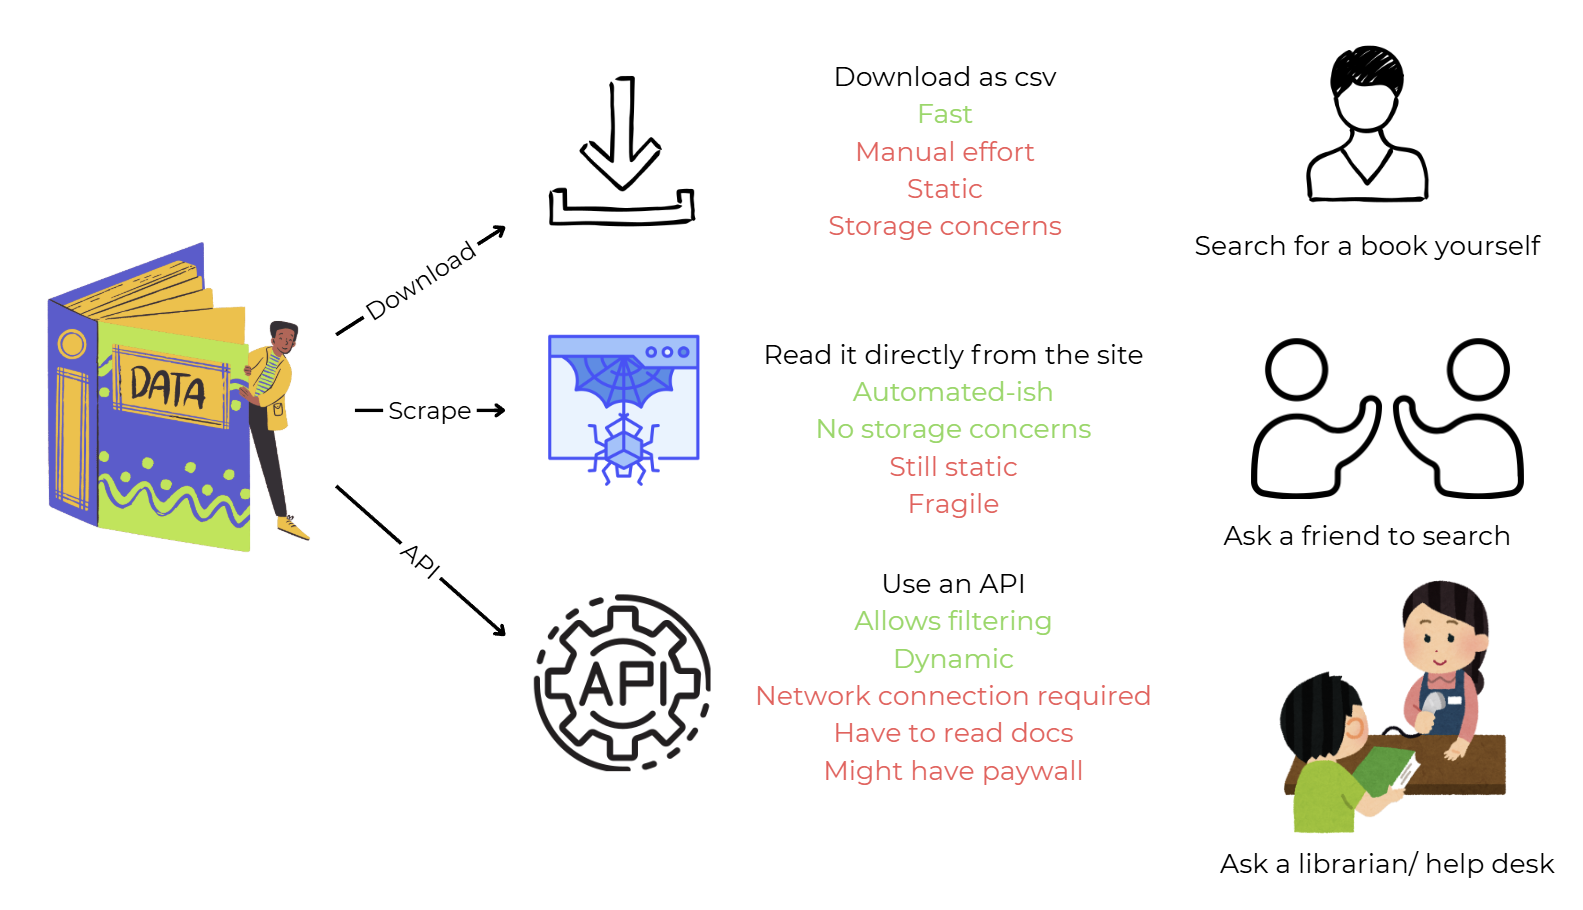


## Setup

[Install](https://computing-in-context.afeld.me/notebooks.html#installing-packages) [`lxml`](https://lxml.de/) and [`requests`](https://requests.readthedocs.io/) packages.


## Part 1: Scraping

Common tools:

- [Beautiful Soup package](https://realpython.com/beautiful-soup-web-scraper-python/)
- [pandas' `read_html()`](https://pandas.pydata.org/docs/user_guide/io.html#html)


### Task

Pull [Wikipedia's list of countries by area](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area#Countries_and_dependencies_by_area) into a DataFrame using `read_html()`.


### Notes

- [Review Lecture 23: APIs](https://computing-in-context.afeld.me/lecture_23.html#apis)
- **Refresher: HTML**
  - Websites are built with [HTML](https://www.w3schools.com/html/html_intro.asp) (HyperText Markup Language). `pandas.read_html()` works by scanning the page’s HTML for table elements and converting them into DataFrames.
- **APIs**
  - In the context of APIs, a request is a message your code sends to a server asking for data (usually in the format of HTML, JSON, etc.).
  - The server replies with a response, which contains the actual data (and a status code).
- **Try `read_html()` directly with the URL**
  - Run `pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area")`. Does this work? Why not? What does the error tell you?
  - This means the server blocked your request, often because pandas doesn’t include browser-like headers, so Wikipedia thinks this is an automated script it should reject.
- **Use `requests` instead**
  - When we manually use `requests.get()`, we can mimic a real browser by adding headers (like `User-Agent`).
  - The server then returns the full HTML as the response — and that HTML can be fed into `pd.read_html()`.


### Hints

1. **Use "Inspect" in the Developer Tools to examine the website.** See class notes [here](https://computing-in-context.afeld.me/lecture_23.html#api-calls-in-the-wild) that have tips for different browsers.
2. **Check "Network" traffic & headers to set up your request.** Open Inspect → Network, reload the page. When you see an API request, click on it, and then view the "Headers." Find the `User-Agent` your browser sends. You can copy this into your `requests.get()` call to make Wikipedia accept your script.


In [1]:
# your code here

## Part 2: Time Series

### Task

Using [MTA ridership data](https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-Beginning-2020/vxuj-8kew/about_data), **view the bus ridership over time**. Start with per day, then do per week.

### Notes

- [Review Lecture 23: Datetimes](https://computing-in-context.afeld.me/lecture_23.html#convert-columns-to-timestamps-using-pandas-to-datetime)
- **Refresher: Datetime**
  - Dates and times in Python are usually handled with `datetime` objects, which store time information in a structured, numerical format instead of plain text. Libraries like `pandas` can parse strings like "2021-04-01" into real datetime objects.
  - Once converted, you can sort, filter, resample (daily/weekly/monthly), and perform calculations on them — operations that wouldn’t work reliably on raw text.
- Feel free to either download the CSV directly, or use an API call to retrieve the data.

### Hints

1. You will need to clean the data! This includes general cleaning, as well as converting to appropriate types (e.g. datetimes).
2. Recall different ways to resample: `.size()` vs. `.sum()`. What is the difference between them? Which function should you use in this case?


In [2]:
# Read data from MTA ridership dataset
# your code here


# Clean columns as needed
# your code here


# Convert date column to datetime
# your code here


# Plot bus ridership per day
# your code here


# Resample data to get bus ridership per week
# your code here


# Plot bus ridership per week
# your code here

## Part 3: API & Pagination

### Task

You're going to pick a [World Bank Indicator](https://data.worldbank.org/indicator) and plot that over time. You'll retrieve the data through [the API](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation).

### Task 3a

For this part, only use data from the first "page" of results.


### Notes

- **Reading API documentation is ESSENTIAL!**
  - Documentation helps you understand what kinds of data is available, and what format it will be in.
  - See [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581) for World Bank API documentation.

### Hints

- Start simple
- Use the Python [requests](https://requests.readthedocs.io/) package
- See [`json_normalize()`](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html)
- Use the "Page" and "Output Format" parameters in the API documentation.


In [4]:
# Send request to World Bank API
# your code here

# Read / format the response
# your code here

# Clean as needed
# your code here

# Plot the indicator over time
# your code here

### Task 3b: Pagination

### Notes

- [Review Lecture 23: Pagination](https://computing-in-context.afeld.me/lecture_23.html#pagination)
- **Pagination**
  - Why are results paginated? Many APIs (including World Bank) limit how many records they return at once to reduce server load and speed up responses. Instead of sending thousands of rows in a single response, they send results in pages (e.g., 100 records at a time). You must ask for page 1, then page 2, and so on.

### Hints

- You'll want to create DataFrames for each page, then "concatenate" them. See below for a general structure you can start with.


In [ ]:
# in a loop
#     get the first/next page of data
#     combine with the data that's already been retrieved
#     if there are fewer than the default number of records returned, stop the loop


# your code here

---

[Submit.](https://computing-in-context.afeld.me/notebooks.html#submission)
